# 22/30 Sklearn : Pre-processing

## 1. Encodage

### Encodage LabelEncoder et LabelBinarizer
#### ⚠ A utiliser seulement avec la target y

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder

In [ ]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2])

In [ ]:
encoder.inverse_transform(np.array([0, 0, 2]))

array(['chat', 'chat', 'oiseau'], dtype='<U6')

In [ ]:
encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

### Encodage Ordinal et Encodage OneHot
#### ⚠ use with features X

In [ ]:
X = np.array([['chat', 'poils'],
              ['chien', 'poils'],
              ['chat', 'poils'],
              ['oiseau', 'plumes']])

encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

## 2. Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

### MinMaxScaler

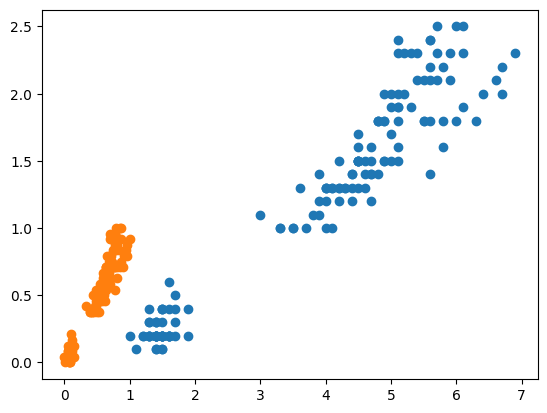

In [ ]:
X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_minmax[:, 2], X_minmax[:, 3])

### StandardScaler

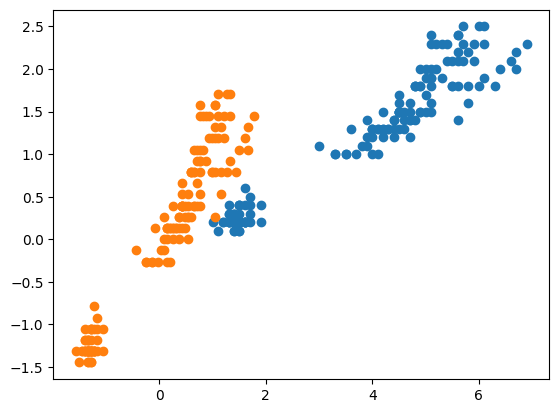

In [ ]:
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3])

### RobustScaler

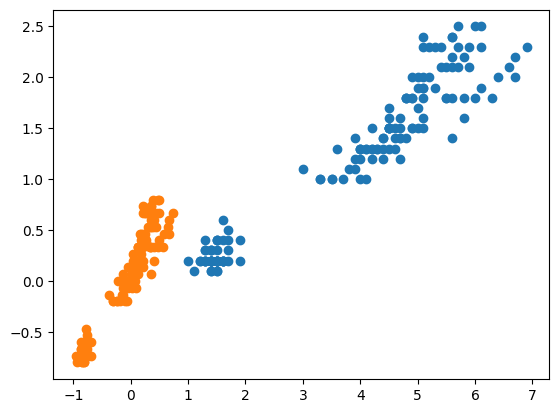

In [ ]:
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_robust[:, 2], X_robust[:, 3])

# 3. Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

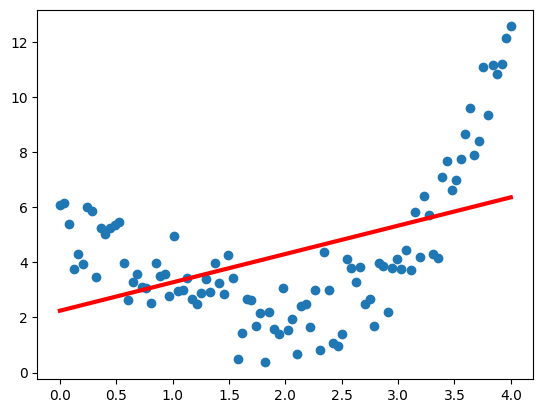

In [ ]:
m = 100
X = np.linspace(0, 4, m).reshape((m, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(m, 1)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

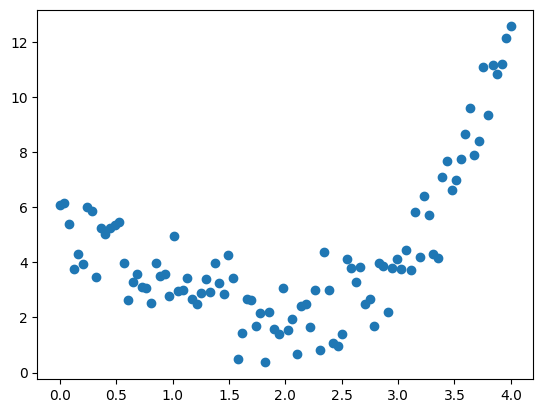

In [ ]:
plt.scatter(X, y)

In [ ]:
X.shape

(100, 1)

In [ ]:
y.shape

(100, 1)

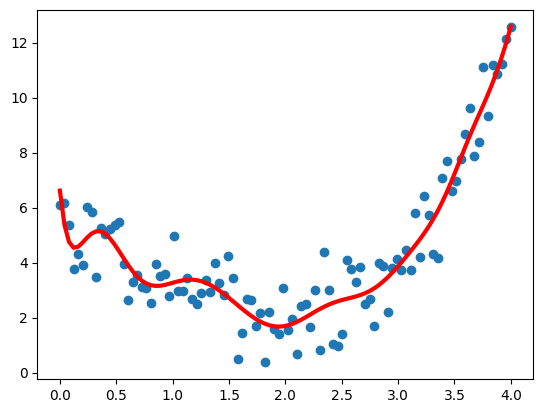

In [ ]:
X_poly = PolynomialFeatures(20).fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

In [ ]:
X_poly.shape

(100, 21)

# 4. Discretisation

In [ ]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [ ]:
X = np.linspace(0, 5, 10).reshape((10, 1))

In [ ]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

In [ ]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

# 5. Pipelines

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
model = make_pipeline(StandardScaler(), SGDClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))
params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'sgdclassifier__penalty':['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

In [ ]:
grid.score(X_test, y_test)